# Pymaceuticals Inc.
---

### Analysis

- First observation about the data: Capomulin and Ramicane had the most observed trials out of all the drugs in the study, per the bar graph. 
- Second observation about the data: The distribution of male and female mice were about even, per the pie chart.
- Third observation about the data: Looking at the specific mouse studied using the line graph, Capomulin consistently decreased the volume of the tumor as the timepoints increased.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.
len(df["Mouse ID"].unique())

249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup = df.loc[df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
dup

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
df.loc[df["Mouse ID"]=="g989",:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = df[df["Mouse ID"].isin(dup)==False]
clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Checking the number of mice in the clean DataFrame.
len(clean["Mouse ID"].unique())

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean["Tumor Volume (mm3)"].groupby(clean["Drug Regimen"]).mean()
median = clean["Tumor Volume (mm3)"].groupby(clean["Drug Regimen"]).median()
var = clean["Tumor Volume (mm3)"].groupby(clean["Drug Regimen"]).var()
std = clean["Tumor Volume (mm3)"].groupby(clean["Drug Regimen"]).std()
sem = clean["Tumor Volume (mm3)"].groupby(clean["Drug Regimen"]).sem()

# Assemble the resulting series into a single summary DataFrame.
sum_stat = pd.DataFrame({"Mean Tumor Volume":mean,"Median Tumor Volume":median,"Tumor Volume Variance":var,
                         "Tumor Volume Std. Dev.":std,"Tumor Volume Std. Err.":sem})
sum_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
sum_agg = clean.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
sum_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

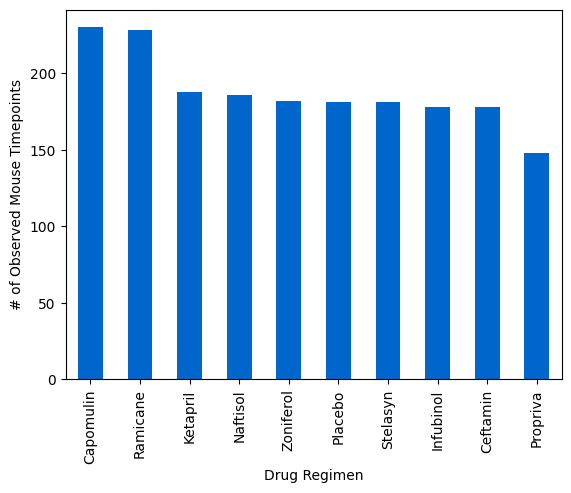

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_plot = clean["Drug Regimen"].value_counts().plot.bar(color="#0066CC")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

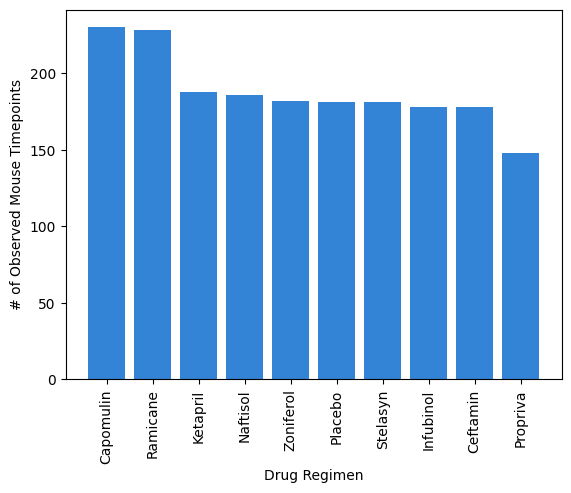

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
count = clean["Drug Regimen"].value_counts()
x_axis = count.index.values
y_axis = count.values

plt.bar(x_axis, y_axis, color="#0066CC", alpha = 0.8, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()

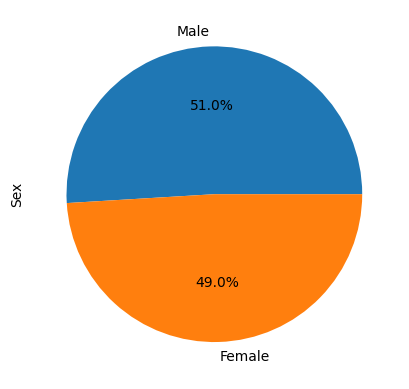

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean["Sex"].value_counts()
gender.plot.pie(autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

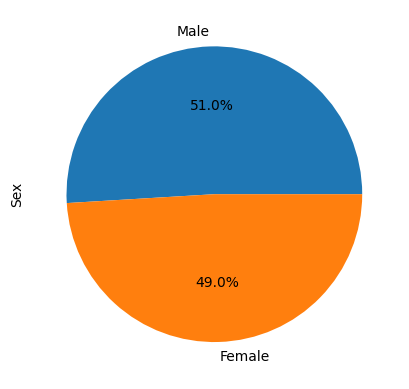

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
#sizes = 
plt.pie(gender, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = clean.loc[clean["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean.loc[clean["Drug Regimen"] == "Ramicane",:]
infubinol_df = clean.loc[clean["Drug Regimen"] == "Infubinol",:]
ceftamin_df = clean.loc[clean["Drug Regimen"] == "Ceftamin",:]

In [19]:
# Start by getting the last (greatest) timepoint for each mouse
capomulin_last = capomulin_df.groupby("Mouse ID").max()["Timepoint"]
ramicane_last = ramicane_df.groupby("Mouse ID").max()["Timepoint"]
infubinol_last = infubinol_df.groupby("Mouse ID").max()["Timepoint"]
ceftamin_last = ceftamin_df.groupby("Mouse ID").max()["Timepoint"]

Mouse ID
b128    45
b742    45
f966    20
g288    45
g316    45
i557    45
i738    45
j119    45
j246    35
l509    45
l897    45
m601    45
m957    45
r157    15
r554    45
r944    45
s185    45
s710    45
t565    45
u364    45
v923    45
w150    10
w914    45
x401    45
y793    45
Name: Timepoint, dtype: int64

In [22]:
# capomulin
capomulin_merge = pd.merge(pd.DataFrame(capomulin_last), clean, on=("Mouse ID","Timepoint"), how="left")
capomulin_tumors = capomulin_merge["Tumor Volume (mm3)"]
quartiles = capomulin_tumors.quantile([.25,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of capomulin tumors is: {lowerq}")
print(f"The upper quartile of capomulin tumors is: {upperq}")
print(f"The interquartile range of capomulin tumors is: {iqr}")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be an outlier")
print(f"Values below {upper_bound} could be an outlier")

The lower quartile of capomulin tumors is: 32.37735684
The upper quartile of capomulin tumors is: 40.1592203
The interquartile range of capomulin tumors is: 7.781863460000004
Values below 20.70456164999999 could be an outlier
Values below 51.83201549 could be an outlier


In [23]:
# ramicane
ramicane_merge = pd.merge(pd.DataFrame(ramicane_last), clean, on=("Mouse ID","Timepoint"), how="left")
ramicane_tumors = ramicane_merge["Tumor Volume (mm3)"]
quartiles2 = ramicane_tumors.quantile([.25,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2
print(f"The lower quartile of ramicane tumors is: {lowerq2}")
print(f"The upper quartile of ramicane tumors is: {upperq2}")
print(f"The interquartile range of ramicane tumors is: {iqr2}")
lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Values below {lower_bound2} could be an outlier")
print(f"Values below {upper_bound2} could be an outlier")

The lower quartile of ramicane tumors is: 31.56046955
The upper quartile of ramicane tumors is: 40.65900627
The interquartile range of ramicane tumors is: 9.098536719999998
Values below 17.912664470000003 could be an outlier
Values below 54.30681135 could be an outlier


In [24]:
# infubinol
infubinol_merge = pd.merge(pd.DataFrame(infubinol_last), clean, on=("Mouse ID","Timepoint"), how="left")
infubinol_tumors = infubinol_merge["Tumor Volume (mm3)"]
quartiles3 = infubinol_tumors.quantile([.25,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3
print(f"The lower quartile of infubinol tumors is: {lowerq3}")
print(f"The upper quartile of infubinol tumors is: {upperq3}")
print(f"The interquartile range of infubinol tumors is: {iqr3}")
lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Values below {lower_bound3} could be an outlier")
print(f"Values below {upper_bound3} could be an outlier")

The lower quartile of infubinol tumors is: 54.04860769
The upper quartile of infubinol tumors is: 65.52574285
The interquartile range of infubinol tumors is: 11.477135160000003
Values below 36.83290494999999 could be an outlier
Values below 82.74144559000001 could be an outlier


In [25]:
# ceftamin
ceftamin_merge = pd.merge(pd.DataFrame(ceftamin_last), clean, on=("Mouse ID","Timepoint"), how="left")
ceftamin_tumors = ceftamin_merge["Tumor Volume (mm3)"]
quartiles4 = ceftamin_tumors.quantile([.25,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4
print(f"The lower quartile of ceftamin tumors is: {lowerq4}")
print(f"The upper quartile of ceftamin tumors is: {upperq4}")
print(f"The interquartile range of ceftamin tumors is: {iqr4}")
lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Values below {lower_bound4} could be an outlier")
print(f"Values below {upper_bound4} could be an outlier")

The lower quartile of ceftamin tumors is: 48.72207785
The upper quartile of ceftamin tumors is: 64.29983003
The interquartile range of ceftamin tumors is: 15.577752179999997
Values below 25.355449580000002 could be an outlier
Values below 87.66645829999999 could be an outlier


In [43]:
capomulin_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


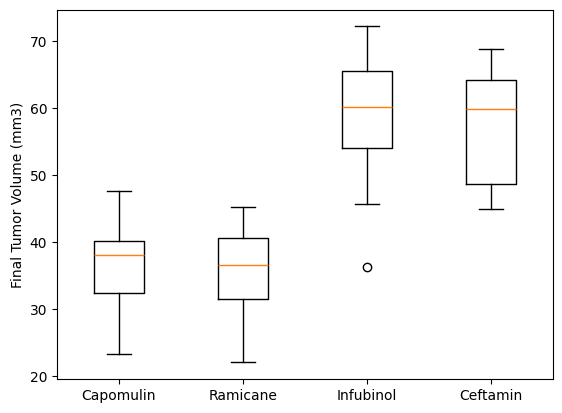

In [29]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plotting_data = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
labels = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
fig,ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(plotting_data, labels=labels, widths = 0.4, vert=True)
plt.show()

## Line and Scatter Plots

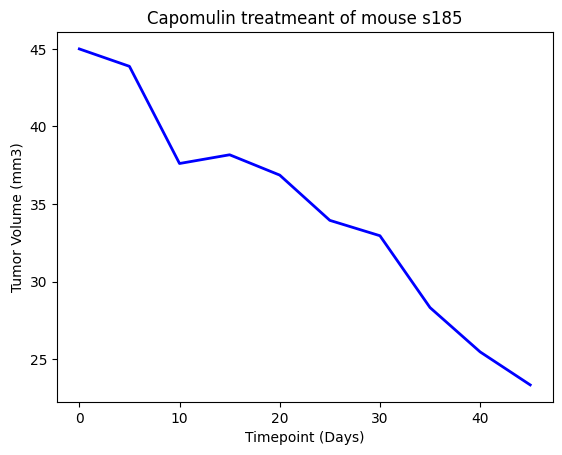

In [35]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185",:]
x_axis = line_df["Timepoint"]
tumsiz = line_df["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse s185')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=12,color="blue")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()



In [55]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#grouped = capomulin_df.groupby("Mouse ID")
capavg = capomulin_df.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]
plt.scatter(capavg["Weight (g)"], capavg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


TypeError: agg function failed [how->mean,dtype->object]

## Correlation and Regression

In [53]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

NameError: name 'capavg' is not defined